### Imports


In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Create Gridworld and parameters


In [11]:

# Create GridWorld environment (FrozenLake)
env = gym.make("FrozenLake-v1", is_slippery=False)  # Ensure deterministic moves

# Q-Learning parameters
alpha = 0.1   # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0 # Start with full exploration
epsilon_decay = 0.995  # Reduce exploration over time
epsilon_min = 0.01  # Minimum exploration probability
episodes = 5000  # More training iterations

# Initialize Q-table with small random values to prevent biasing toward 0
Q = np.random.uniform(low=-0.01, high=0.01, size=(env.observation_space.n, env.action_space.n))
initial_Q = Q.copy()  # Save initial Q-table for MSS comparison


### Training Loop


In [12]:

# Training loop
reward_tracking = []
steps_per_episode = []  # Store the number of steps per episode

for episode in range(episodes):
    state_info = env.reset()
    state = state_info[0] if isinstance(state_info, tuple) else state_info  # Handle different Gym versions
    total_reward = 0
    done = False
    steps = 0  # Track steps per episode

    while not done:
        steps += 1  # Increment step count

        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore (random action)
        else:
            action = np.argmax(Q[state])  # Exploit (best action)

        # Take action, get new state & reward
        next_state_info = env.step(action)
        next_state = next_state_info[0] if isinstance(next_state_info, tuple) else next_state_info
        reward = next_state_info[1]
        done = next_state_info[2]

        # Q-value update using Bellman Equation
        best_next_action = np.max(Q[next_state])
        Q[state, action] += alpha * (reward + gamma * best_next_action - Q[state, action])

        state = next_state  # Move to next state
        total_reward += reward

    reward_tracking.append(total_reward)
    steps_per_episode.append(steps)  # Store the number of steps taken

    # Decay epsilon to shift from exploration to exploitation
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

# Compute Mean Sum of Squares (MSS) between initial and final Q-table
mss = np.mean((Q - initial_Q) ** 2)


### Results



Initial Q-Table (Before Training):
[[ 0.00075886  0.0032221   0.00471816  0.00440009]
 [ 0.00164302 -0.00726531 -0.00423673  0.00663942]
 [-0.00379169  0.00800759 -0.00061044 -0.0013371 ]
 [ 0.00704545 -0.00863612  0.0082028  -0.0029219 ]
 [-0.00967869  0.0051066   0.00281064 -0.00713417]
 [-0.00393998  0.00276625  0.00810511 -0.00954063]
 [ 0.00693121 -0.00274632  0.00608512 -0.00637976]
 [ 0.00927998 -0.00392896  0.00762826  0.00035213]
 [-0.0096552  -0.00409693  0.00352933  0.00456656]
 [-0.00270877 -0.00053629 -0.00511679 -0.00014817]
 [ 0.00482334  0.00722899 -0.00918373  0.00689502]
 [ 0.00770199 -0.00387647  0.0072077   0.0035989 ]
 [ 0.00160707  0.00970817 -0.00649691  0.00177783]
 [-0.00718742 -0.00309297  0.00176629  0.00623326]
 [ 0.00946014  0.00119899 -0.00423669  0.00212187]
 [ 0.00634898 -0.00738443  0.00899574 -0.00472402]]

Final Q-Table (After Training):
[[ 8.12187973e-03  7.94381919e-03  8.91431613e-03  7.95587269e-03]
 [ 6.72151594e-03  7.03620134e-03  9.00435972e-

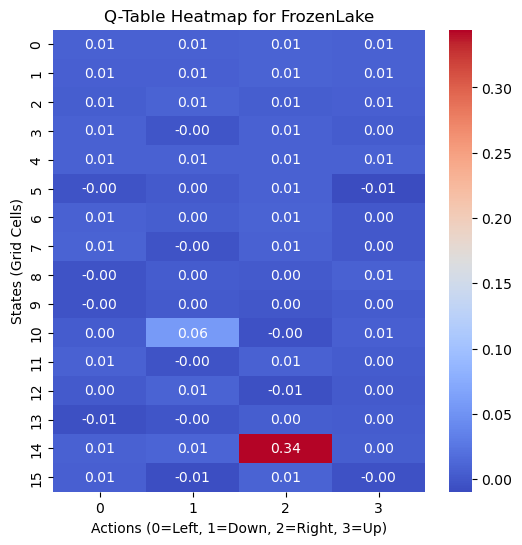

In [13]:

# Print Q-table comparison
print("\nInitial Q-Table (Before Training):")
print(initial_Q)
print("\nFinal Q-Table (After Training):")
print(Q)

# Print MSS and average steps to reach goal
print(f"\nMean Sum of Squares (MSS) between initial and final Q-table: {mss:.6f}")
print(f"Average Steps to Reach Goal: {np.mean(steps_per_episode):.2f}")

# Visualizing Q-Values as a Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(Q, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Q-Table Heatmap for FrozenLake")
plt.xlabel("Actions (0=Left, 1=Down, 2=Right, 3=Up)")
plt.ylabel("States (Grid Cells)")
plt.show()


### Test trained agent


In [14]:

# Test the trained agent
num_test_episodes = 5
for test in range(num_test_episodes):
    print(f"\nTest Episode {test+1}")
    state_info = env.reset()
    state = state_info[0] if isinstance(state_info, tuple) else state_info

    env.render()
    steps = 0  # Track steps in test episode
    for _ in range(10):  # Max steps per test
        steps += 1
        action = np.argmax(Q[state])  # Choose best learned action
        print(f"Chosen action: {action}")  # Debug agent movement

        next_state_info = env.step(action)
        state = next_state_info[0] if isinstance(next_state_info, tuple) else next_state_info
        env.render()

        if next_state_info[2]:  # If done (goal or hole)
            break
    print(f"Steps taken in this episode: {steps}")

env.close()


Test Episode 1

SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps taken in this episode: 4

Test Episode 2

SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps taken in this episode: 4

Test Episode 3

SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps taken in this episode: 4

Test Episode 4

SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Chosen action: 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Chosen action: 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps taken